# IPL Data Visualization Demo Notebook

## Resolve Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

# Ploty Related Imports

import plotly.plotly as py
import plotly
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=True, theme='pearl')

import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True) # Use Plotly offline mode without tokens

# Custom Imports
from utilities.metrics import *
from utilities.vis_funcs import *
from utilities.plots import *
from utilities.utils import *

## Check Data Files

In [2]:
data_path = './data'
print(os.listdir(data_path))

['player_batting_performance.csv', 'players_wiki.csv', 'matches_excel.xlsx', 'captains_analysis.csv', '2018_ages.csv', '~$matches_excel.xlsx', 'leader_wiki2.csv', 'player_bowling_performance.csv', 'players_age_wiki.csv', '.ipynb_checkpoints', 'team_performance.csv', 'toss_result.csv', 'ball_by_ball_data.xlsx', 'deliveries.csv', 'match_results.csv', 'leader_wiki1.csv', 'match.csv', 'match_result.csv', 'matches.csv', '2019_ages.csv', 'players_wiki_excel.xlsx', '6ECD1200', 'ball_by_ball_data.csv', 'teams_record.csv']


# Who are the IPL winners ?

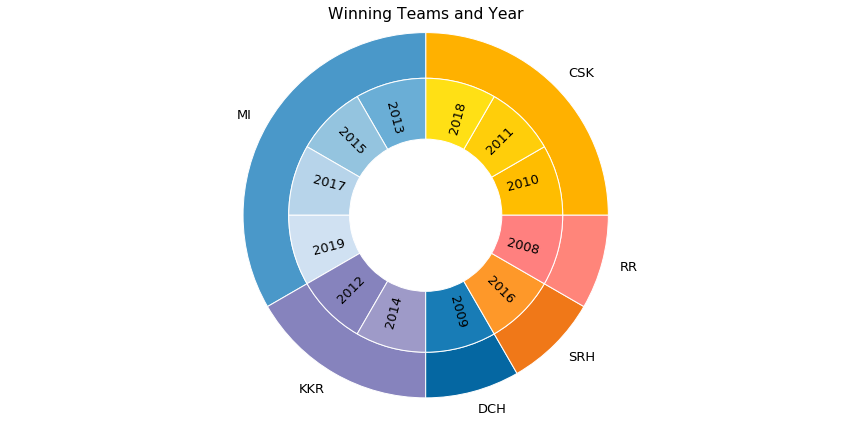

In [3]:
# get the data
group_names, group_size, subgroup_names, subgroup_size = get_winners()

# Create colors
a, b, c=[plt.cm.Wistia, plt.cm.Blues, plt.cm.Purples]
d, e, f=[plt.cm.PuBu, plt.cm.YlOrBr, plt.cm.spring]
 
# First Ring (outside)
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(15,7))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.8), e(0.6), f(0.52)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2-0.3, labels=subgroup_names, \
                   labeldistance=0.6, colors=[a(0.5), a(0.4), a(0.3), \
                    b(0.5), b(0.4), b(0.3), b(0.2), c(0.6), c(0.5), d(0.7), e(0.5), f(0.5)], rotatelabels=True)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Winning Teams and Year')
# show it
plt.show()

## Head to Head Heatmap

In [4]:
heat_file = pd.read_csv(os.path.join(data_path, 'match.csv'))
team_name_rank = ['Royal Challengers Bangalore','Kings XI Punjab','Mumbai Indians','Kolkata Knight Riders',\
                 'Chennai Super Kings','Delhi Capitals','Rajasthan Royals','Sunrisers Hyderabad']
table = heat_file.loc[:,['team1','team2','winner']]
grp = table.groupby('team1')
team_name_sort =sort_name(team_name_rank)
result ,total_win = win_heatmap(grp,team_name_rank)

In [5]:
data = [go.Heatmap(z = result,x=team_name_sort,y=team_name_sort,colorscale='Reds')]
layout = go.Layout(
    title = dict(text = 'Head to Head',
                 font = dict(family='Times New Roman, monospace', size=20, color='#000000'),
                 x = 0,
                 xref = 'paper'),
    width = 900, height = 700,
    xaxis = dict(tickfont = dict(family = 'Old Standard TT, serif',
                 size = 12,
                 color = 'black'),
                 tickangle = 30),
    yaxis = dict(tickfont = dict(family = 'Old Standard TT, serif',
                 size = 12,
                 color = 'black'))
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

/home/siddhant/.virtualenvs/ECE143Project/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Toss winning stats

In [6]:
heat_file = pd.read_csv(os.path.join(data_path, 'match.csv'))
toss_decisions = heat_file[['toss_winner', 'toss_decision', 'id']].\
                        groupby(['toss_winner', 'toss_decision']).agg({'id': 'count'})

toss_decisions.head(3)
toss_decisions = toss_decisions.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
result ,total_win = win_heatmap(grp,team_name_rank)
table = heat_file.loc[:,['team1','team2','winner']]
grp = table.groupby('team1')
sb3 = pd.DataFrame(data = total_win,columns=['Win rate total'],index = team_name_rank)
sb3.sort_index(inplace=True)
sb3 = sb3.apply(lambda x: 100 * x)

In [7]:
index = [0,4,7,3,5,2,6,1]
a = list(sb3.index)
a = [a[i] for i in index]
a = sort_name(a)
b = list(sb3.values)
b = [b[i] for i in index]

trace1 = go.Scatter(
    x = a,
    y = b,
    name = 'Winning rate',
    marker = dict(color= 'rgba(219, 64, 82, 1.0)')
)
index = [0,7,-1,6,9,4,-2,2]
b = list(toss_decisions.id)[0::2]
b = [b[i] for i in index]
trace2 = go.Bar(
    x = a,
    y = b,
    name = 'Bat',
    width = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    marker = dict(
        color = 'rgba(219, 64, 82, 0.7)',
        line=dict(color='rgba(219, 64, 82, 1.0)',width=2)
    )
)

b = list(toss_decisions.id)[1::2]
b = [b[i] for i in index]

trace3 = go.Bar(
    x = a,
    y = b,
    name = 'Field',
    width = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    marker = dict(
        color = 'rgba(55, 128, 191, 0.7)',
        line = dict(color='rgba(55, 128, 191, 1.0)',width=2),
    )
)
#292942
data = [trace1, trace2, trace3]
layout = go.Layout(
    title=dict(text = 'Toss result',
               font = dict(family='Times New Roman, monospace', size=20, color='#000000'),
               x = 0,
               xref = 'paper'
               ),
    xaxis = dict(tickangle = 30,
                 tickfont = dict(family='Times New Roman, monospace', size=12, color='#000000')
                 ),
    yaxis = dict(title = 'Percent',range = [0,100],
                 titlefont = dict(family='Times New Roman, monospace', size=16, color='#000000'),
                 tickfont = dict(family='Times New Roman, monospace', size=12, color='#000000')),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='bar-line')

/home/siddhant/.virtualenvs/ECE143Project/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Team Ranks over time

In [8]:
rank_file = pd.read_csv(os.path.join(data_path, 'team_performance.csv'))
result_rank = rank(rank_file)

In [9]:
data = []
for i in range(len(result_rank)):
    data.append(go.Scatter(
        x = list(range(2008,2020)),
        y = list(result_rank[i]),
        name = team_name_rank[i],
    ))


layout = go.Layout(
  annotations = [
    dict(
      x = 2007.5,
      y = 2,
      showarrow = False,
      text = "Top Four",
      xref = "paper",
      yref = "paper"
    ),
    dict(
      x = 2007.5,
      y = 6,
      showarrow = False,
      text = "trash",
      xref = "paper",
      yref = "paper"
    )
  ],
  showlegend = True,
  title = dict(text = "Ranking",x=0,xref = 'paper',
              font = dict(family='Times New Roman, monospace', size=20, color='#000000')),
  yaxis = dict(range=[10.5, 0]),
  xaxis = dict(showgrid=False)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='rank')

## Batting and Bowling Ability Analysis for Teams and Players

### 10 Best and 10 Worst Bowlers

In [10]:
ball_data = load_data_as_df(os.path.join(data_path, 'deliveries.csv'))

#Get Bowling Stats Player-wise
eco = economy(ball_data.copy())
wick = wicket_taking(ball_data.copy())

# Keep only regular bowlers
eco_100 = eco[eco['Number of Balls Thrown']>1000]
wick_100 = wick[wick['Number of Balls Thrown']>1000]

# Merge Stats
out = pd.merge(wick_100, eco_100, how='inner', on=['bowler','Number of Balls Thrown'])

In [11]:
## Generate and format Plot

out_best = out.nsmallest(10, 'Economy')
out_worst = out.nlargest(10, 'Economy')

b_comp = pd.concat([out_best, out_worst])
layout = go.Layout(
    title=dict(
        text="10 Best and 10 Worst Bowlers",
        xref="paper",
        font = dict(size=20),
        x=0
    
    ),
  legend = dict(
    x = 1,
    y = 0
  ),
    xaxis=dict(
        title='Economy',
        titlefont=dict(
            size=20,
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Wicket Taking Ability',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
        ),
        showticklabels=True,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
b_comp.iplot(layout= layout, kind='bubble', x='Economy', y='Wicket Taking Ability', categories='bowler', size='Number of Wickets taken', text='bowler',
          xTitle='Bowler Economy', yTitle='Bowler Wicket Taking Ability', filename='cufflinks/simple-bubble-chart')

### 10 Best and 10 Worst Batsmen

In [12]:
# Calculate Metrics
hh = hard_hit(ball_data.copy())
fs = fast_scoring(ball_data.copy())

# Keep regular batsmen
hh_100 = hh[hh['Number of Balls Faced']>800]
fs_100 = fs[fs['Number of Balls Faced']>800]
out = pd.merge(hh_100, fs_100, how='inner', on=['batsman','Number of Balls Faced'])

In [13]:
# Generate and Format Plot

out_best = out.nsmallest(10, 'Fast Scoring')
out_worst = out.nlargest(10, 'Fast Scoring')

layout = go.Layout(
    title=dict(
        text="10 Best and 10 Worst Batsman",
        xref="paper",
        font = dict(size=20),
        x=0
    
    ),
  legend = dict(
    x = 1,
    y = 0
  ),
    xaxis=dict(
        title='Hard Hit',
        titlefont=dict(
            size=20,
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Fast Scoring Ability',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
        ),
        showticklabels=True,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)

b_comp = pd.concat([out_best, out_worst])
b_comp.iplot(layout=layout, kind='bubble', x='Hard Hit', y='Fast Scoring', categories='batsman', size='runs', text='batsman',
          xTitle='Hard Hit', yTitle='Fast Scoring Ability', filename='cufflinks/simple-bubble-chart')

### Team Wise Analysis (2 Best and 2 Worst)

In [14]:
# Team-wise bowling stats
eco = economy(ball_data.copy(), bowler='bowling_team')
wick = wicket_taking(ball_data.copy(), bowler='bowling_team')
eco_100 = eco[eco['Number of Balls Thrown']>10000]
wick_100 = wick[wick['Number of Balls Thrown']>10000]
out_bowl = pd.merge(wick_100, eco_100, how='inner', on=['bowling_team','Number of Balls Thrown'])

# Team-wise batting stats
hh = hard_hit(ball_data.copy(), batter='batting_team')
fs = fast_scoring(ball_data.copy(), batter='batting_team')
hh_100 = hh[hh['Number of Balls Faced']>10000]
fs_100 = fs[fs['Number of Balls Faced']>10000]
out_bat = pd.merge(hh_100, fs_100, how='inner', on=['batting_team','Number of Balls Faced'])


out_bowl.drop(out_bowl.columns.difference(['bowling_team', 'Wicket Taking Ability', 'Economy']), 1, inplace=True)
out_bat.drop(out_bat.columns.difference(['batting_team', 'Fast Scoring','Hard Hit']),1,inplace=True)

out_bowl.rename(columns={'bowling_team':'team'}, inplace=True)
out_bat.rename(columns={'batting_team': 'team'}, inplace=True)

out_full = pd.merge(out_bat, out_bowl, how='inner', on=['team'])

# scale values to fit and outwards = better

o = out_full.copy()
min_max_scaler = preprocessing.StandardScaler( with_std=False)
o['Hard Hit'] = pd.DataFrame(min_max_scaler.fit_transform(o['Hard Hit'].values.reshape(-1,1)))
o['Fast Scoring'] = pd.DataFrame(min_max_scaler.fit_transform(o['Fast Scoring'].values.reshape(-1,1)))
o['Economy'] = pd.DataFrame(min_max_scaler.fit_transform(o['Economy'].values.reshape(-1,1)))
o['Wicket Taking Ability'] = pd.DataFrame(min_max_scaler.fit_transform(o['Wicket Taking Ability'].values.reshape(-1,1)))
o.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

In [15]:
# Generate and Format Plots
data = []

count = 0
for i in [4, 2, 5, 1]:
    r = o.iloc[i,:]
    t = go.Scatterpolar(
      r = [r['Hard Hit']*1000, r['Fast Scoring']*100, r['Economy']*-10, r['Wicket Taking Ability']*-5, r['Hard Hit']*1000],
      theta = ['Hard Hit','Fast Scoring','Economy', 'Wicket Taking Ability', 'Hard Hit'],
      fill = 'toself',
      name = r['team'],
      subplot = "polar"+str(count+1) if i>0 else "polar"
    )
    count = count+1
    data.append(t)


layout = go.Layout(
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=0
    ),
  polar = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0.56, 1]
      ),
    radialaxis = dict(
      visible = True,
      range = [-10, 7]
    )
  ),
  polar2 = dict(
     domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
    radialaxis = dict(
      visible = True,
      range = [-10, 7]
    )
  ),
  polar3 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0.56, 1]
      ),
    radialaxis = dict(
      visible = True,
      range = [-10, 7]
    )
  ),
  polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
    radialaxis = dict(
      visible = True,
      range = [-10, 7]
    )
  ),
  showlegend = True
    
)

fig = go.Figure(data=data, layout=layout)
t = plotly.offline.iplot(fig, filename="multiple-subplots")

In [16]:
# Generate and Format overlapped Plots
data = []

count = 0
for i in [4, 2, 5, 1]:
    r = o.iloc[i,:]
    t = go.Scatterpolar(
      r = [r['Hard Hit']*1000, r['Fast Scoring']*100, r['Economy']*-10, r['Wicket Taking Ability']*-5, r['Hard Hit']*1000],
      theta = ['Hard Hit','Fast Scoring','Economy', 'Wicket Taking Ability', 'Hard Hit'],
      fill = 'toself',
      name = r['team']
    )
    count = count+1
    data.append(t)


layout = go.Layout(

  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-10, 7]
    )
  ),
  showlegend = True
    
)

fig = go.Figure(data=data, layout=layout)
t = plotly.offline.iplot(fig, filename="multiple-subplots")

# Does changing players matter ?

In [17]:
ball_data = pd.read_csv(data_path + '/ball_by_ball_data.csv')

# preprocess team names
preprocess_team_names(ball_data)

In [18]:
used_players = get_used_players(ball_data)

# pick only teams that played more than 100 players
used_players = used_players[used_players['Total matches']>=100]

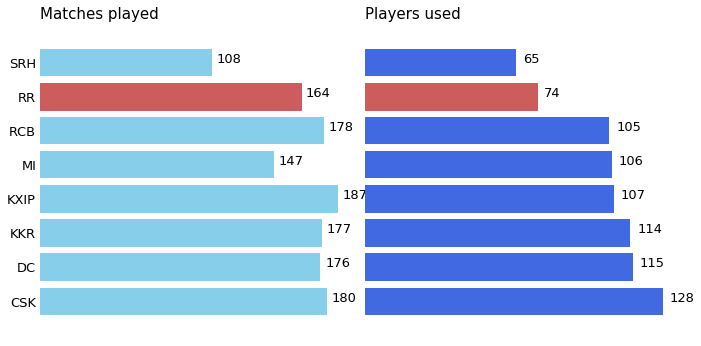

In [19]:
# team names
y = used_players.index
used_players.sort_values(by=['Number of players used'],inplace=True, ascending=False)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
barlist1 = axes[0].barh(y, used_players['Total matches'].values, align='center', color='skyblue', zorder=10)
axes[0].set_title('Matches played', loc='left', fontsize=15)
barlist2 = axes[1].barh(y, used_players['Number of players used'].values, align='center', color='royalblue', zorder=10)
axes[1].set_title('Players used', loc='left', fontsize=15)

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

axes[0].tick_params(axis=u'both', which=u'both',length=0)

axes[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axes[1].tick_params(axis=u'both', which=u'both',length=0)

for ax in axes.flat:
    ax.margins(0.09)
#     ax.grid(True)

for i, v in enumerate(used_players['Total matches'].values):
    axes[0].text(v + 3, i , str(v), color='black') # fontweight='bold'

for i, v in enumerate(used_players['Number of players used'].values):
    axes[1].text(v + 3, i , str(v), color='black') # fontweight='bold'
    
fig.tight_layout()
fig.subplots_adjust(wspace=0)
barlist1[6].set_color('indianred')
barlist2[6].set_color('indianred')
plt.show()

# Does changing captain matter ?

In [20]:
# get captains information required
captains = get_captains_data()

In [21]:
# for number of captains
trace1 = go.Scatter(
    x=captains.index,
    y=captains['Number of captains'],
    name='Number of captains'
)

# for qualification rate
trace2 = go.Scatter(
    x=captains.index,
    y=captains['qualification rate'],
    name='Qualification rate',
    yaxis='y2'
)
data = [trace1, trace2]

layout = go.Layout(
#     title='Captains vs Qualification rate',
    title = dict(text = 'Captains vs Qualification rate',
                font = dict(family='Times New Roman, monospace', size=20, color='#000000'),
                x = 0,
                xref = 'paper'),
    yaxis=dict(
        title='Number of captains'
    ),
    yaxis2=dict(
        title='Qualification rate',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    xaxis = dict(tickangle=22)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

/home/siddhant/.virtualenvs/ECE143Project/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

